In [1]:
import pandas as pd
pd.options.display.max_columns = 100
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as md
#pip install sentiment-analysis-spanish
from sentiment_analysis_spanish import sentiment_analysis

import re
#from os import path
#import numpy as np
from wordcloud import WordCloud, ImageColorGenerator

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize 

In [2]:
df = pd.read_csv('base_limpia.csv')
df.head()

,date,tweet,sentiment
0,2021-03-02,"Hola Carlos, ¿realizaste algún bloqueo de tus ...",9.306416e-03
1,2021-03-02,cerró las cuentas,4.737107e-01
2,2021-03-02,"Así es, los demás no la hacen nada de mal........",7.706142e-06
3,2021-03-02,estaría weno,4.978923e-01
4,2021-03-02,"Otro más, favor a mis seguidoras(es) denunciar...",2.214514e-07


In [3]:
# quitamos mayúsculas
df["tweet"] = df["tweet"].str.lower().replace('no puedo','nopuedo').replace('no funciona','nofunciona').replace('no me funciona','nofunciona')


In [4]:
def normalize(s):
    replacements = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
    )
    for a, b in replacements:
        s = s.replace(a, b).replace(a.upper(), b.upper())
    return s

In [5]:
df['tweet'] = df.apply(lambda row : normalize(row['tweet']), axis = 1)

In [6]:
#nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

In [7]:
stop_words.update(['banco','bancoestado','estado','(',')',' " ','q','chile','ahora','si','..','.','...',':'
                  ,',','hola','?',']','['])

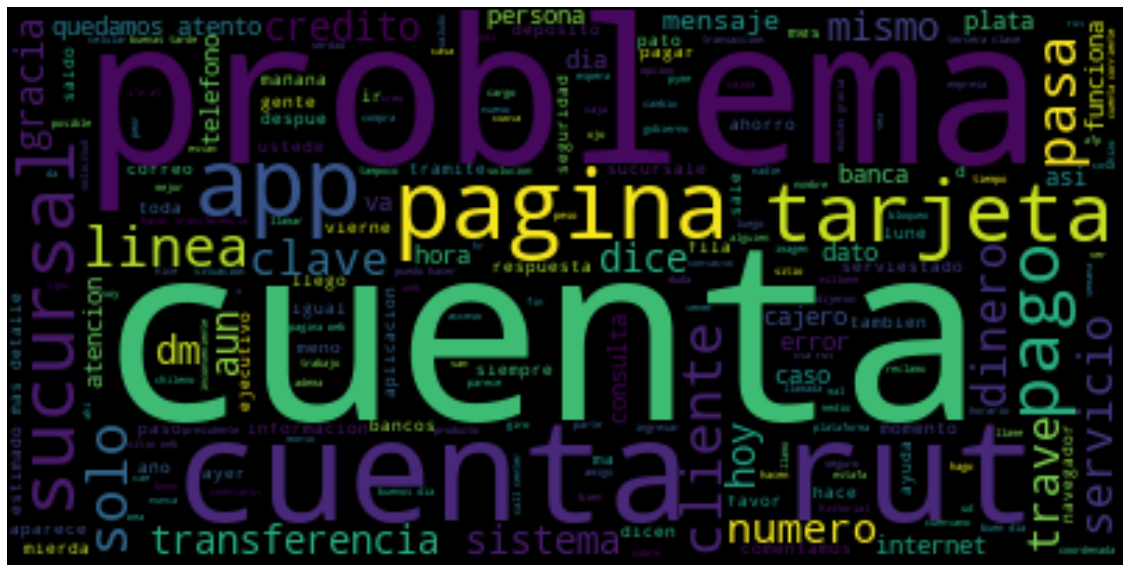

In [8]:
textt = ' '.join( [twts for twts in df['tweet']])
wordcloud = WordCloud(stopwords=stop_words).generate(textt)

plt.figure(1,figsize=(20, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

Tomando la serie diaria, vemos cuales son las palábras más repetidas en los días de "máxima queja"

Primero, identificamos los días como mayores alzas en volumen de  tweets
Para esto, generamos una base estructurada por día, y colapsamos todos los tweets en una línea de texto para el día.

DataFrame: [fecha, volumen, texto, sentimiento]

In [9]:
data = df.loc[::-1].reset_index(drop = True)
data.head()

,date,tweet,sentiment
0,2010-01-01,"comienzo 2010 feliz x mi familia, gratitud ban...",0.713020
1,2010-01-04,comerciantes ambulantes hacen caso omiso y sig...,0.121589
2,2010-01-04,"la pagina del banco estado es un asco, solo re...",0.143255
3,2010-01-04,shuuuu!!! sorry pido disculpas a nombre de ban...,0.000026
4,2010-01-04,oiga... sres banco estado su pagina web es pes...,0.134938


In [10]:
data.groupby("date").size().values

array([  1,   8,  11, ..., 242, 577, 551], dtype=int64)

In [11]:
fechas = data['date'].unique() # recorridas en sentido contrario a volumen!
volumen = data.groupby("date").size().values

In [12]:
data = pd.DataFrame({'date': fechas, 'volumen':volumen})
data.head()

,date,volumen
0,2010-01-01,1
1,2010-01-04,8
2,2010-01-05,11
3,2010-01-06,8
4,2010-01-07,5


In [13]:
data['text'] = ''
for i in range(fechas.size):
    aux = df[df['date'] == fechas[i]]['tweet']
    data['text'][i] = ' '.join( [twts for twts in aux])

<ipython-input-13-1dc77c2142ff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'][i] = ' '.join( [twts for twts in aux])


In [14]:
data.head()

,date,volumen,text
0,2010-01-01,1,"comienzo 2010 feliz x mi familia, gratitud ban..."
1,2010-01-04,8,no me funciona la clave del banco estado :( rt...
2,2010-01-05,11,"y hay otros peores, es cosa de husmear en la b..."
3,2010-01-06,8,un redbank de banco estado? banco estado de ra...
4,2010-01-07,5,asi con el lanzamiento en el centro de eventos...


In [56]:
# ejemplito
text = data['text'][1]
print(text)
text_token = word_tokenize(text)
print('\n')
print(text_token)

clean = [word for word in word_tokenize(text) if word not in stop_words]
clean_text = ' '.join(clean)
print('\n')
print(clean_text)

#clean = [word for word in text.split() if word not in stop_words] o usando re.split(r"\W+", text)
#print('\n')
#print(clean)
#clean_text = ' '.join(clean)
#print('\n')
#print(clean_text)

no me funciona la clave del banco estado :( rt: : por que firefox y bancoestado no se llevan bien?|| yo juraba que se llevaban bien mira por que firefox y bancoestado no se llevan bien? saliendo al banco estado…&lt;paja mode on&gt; oiga... sres banco estado su pagina web es pesima!!! gracias. shuuuu!!! sorry pido disculpas a nombre de bancoestado, pero estamos trabajando para mejorar, se los prometo! la pagina del banco estado es un asco, solo realiza transferencias desde ie :s comerciantes ambulantes hacen caso omiso y siguen fijos fuera del banco estado en bulnes


['no', 'me', 'funciona', 'la', 'clave', 'del', 'banco', 'estado', ':', '(', 'rt', ':', ':', 'por', 'que', 'firefox', 'y', 'bancoestado', 'no', 'se', 'llevan', 'bien', '?', '||', 'yo', 'juraba', 'que', 'se', 'llevaban', 'bien', 'mira', 'por', 'que', 'firefox', 'y', 'bancoestado', 'no', 'se', 'llevan', 'bien', '?', 'saliendo', 'al', 'banco', 'estado…', '&', 'lt', ';', 'paja', 'mode', 'on', '&', 'gt', ';', 'oiga', '...', 'sre

In [16]:
# tokenize  text 
data['clean_txt'] = ''
for i in range(fechas.size): 
    text = data['text'][i]
    clean = [word for word in word_tokenize(text) if word not in stop_words]
    clean_text = ' '.join(clean)
    data['clean_txt'][i] = clean_text

<ipython-input-16-39000cc0fa67>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_txt'][i] = clean_text


In [17]:
sentiment = sentiment_analysis.SentimentAnalysisSpanish()
data['sentiment'] = data.apply(lambda row : sentiment.sentiment(row['clean_txt']), axis = 1) 
data['sentiment_raw'] = data.apply(lambda row : sentiment.sentiment(row['text']), axis = 1)

In [18]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data

,volumen,text,clean_txt,sentiment,sentiment_raw
date,,,,,
2010-01-01,1,"comienzo 2010 feliz x mi familia, gratitud ban...",comienzo 2010 feliz x familia gratitud cestas ...,8.702934e-01,7.130203e-01
2010-01-04,8,no me funciona la clave del banco estado :( rt...,funciona clave rt firefox llevan bien || jurab...,6.375392e-05,3.161207e-15
2010-01-05,11,"y hay otros peores, es cosa de husmear en la b...",peores cosa husmear bd esperando gorrllo afuer...,4.027127e-07,7.368970e-18
2010-01-06,8,un redbank de banco estado? banco estado de ra...,redbank rancagua independencia llamaba patrici...,8.368187e-08,2.721450e-20
2010-01-07,5,asi con el lanzamiento en el centro de eventos...,asi lanzamiento centro eventos puro webeo maña...,7.170490e-02,2.306362e-01
...,...,...,...,...,...
2021-02-26,507,banco estado dando la nota otra vez. no hay tr...,dando nota vez transacciones pesimo ser credit...,0.000000e+00,0.000000e+00
2021-02-27,293,banco estado los domingo no atiende cierto? bu...,domingo atiende cierto busque pagina santander...,0.000000e+00,0.000000e+00
2021-02-28,242,arreglen su mierda de pagina para pagar su put...,arreglen mierda pagina pagar puto cae ! 4 mese...,1.325784e-249,0.000000e+00


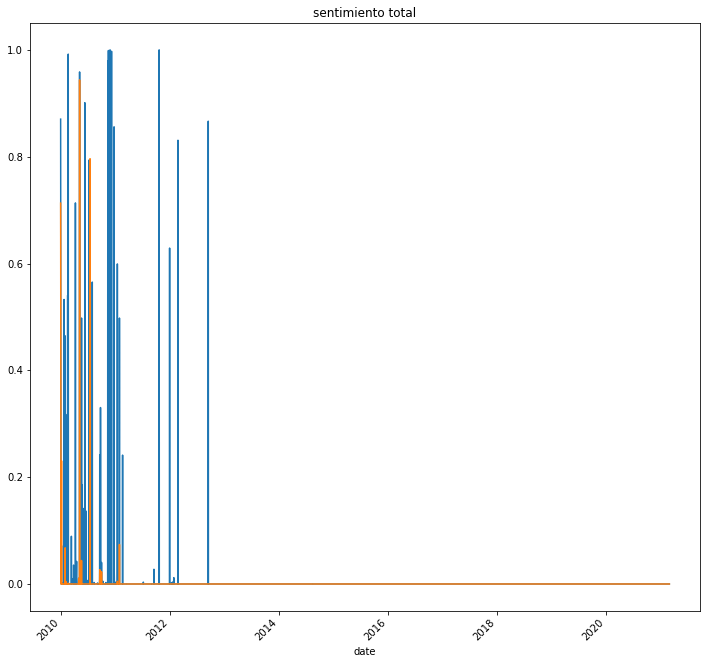

In [19]:
plt.figure(figsize=(12, 12))
ax = data['sentiment'].plot()
ax2 = data['sentiment_raw'].plot()
#ax.xaxis.set_major_locator(md.YearLocator())
#ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45)
ax.set_title('sentimiento total')
plt.show()

# azul: sentimiento aplicado a texto filtrado
# naranjo : sentimiento aplicado a texto completo

In [20]:
data[data["sentiment"] >= 0.4]

,volumen,text,clean_txt,sentiment,sentiment_raw
date,,,,,
2010-01-01,1,"comienzo 2010 feliz x mi familia, gratitud ban...",comienzo 2010 feliz x familia gratitud cestas ...,0.870293,7.130203e-01
2010-01-24,4,"canto por haiti, miercoles 27 enero, 20 hrs $5...",canto haiti miercoles 27 enero 20 hrs $ 5.000 ...,0.532655,1.930553e-08
2010-01-31,3,sistema de cobro de licencias a traves del ban...,sistema cobro licencias traves region encuentr...,0.464597,6.774726e-02
2010-02-17,8,//consejos para salvar a canal13 //sacar de pa...,//consejos salvar canal13 //sacar pantalla edu...,0.540626,5.020001e-11
2010-02-21,4,aunque no lo crean las piernas de la tonka en ...,aunque crean piernas tonka comercial reemplaza...,0.992029,1.617827e-03
2010-04-10,6,"7:40 en la casa central del banco estado, alam...",7:40 casa central alameda bandera entonces mañ...,0.713433,1.517228e-04
2010-05-08,1,entrenando para el partido de las 4 (@ centro ...,entrenando partido 4 @ centro deportivo,0.958655,9.437378e-01
2010-05-21,1,"si el banco estado comprara duracell, la masco...",comprara duracell mascota seria,0.497892,4.398916e-02
2010-06-12,33,bombazo -ke no es lo mismo ke bomba 4- en un b...,bombazo -ke mismo ke bomba 4- unico ke pienso ...,0.901098,4.611636e-41


In [21]:
data.loc['2010-01-01']['text']

'comienzo 2010 feliz x mi familia, gratitud bancoestado cestas octantis; esperanza x chile y entusiasmado x nuevo equipo y desafio innovacion'

In [22]:
data.loc['2011-10-23']['text']

'son esas canciones de moda... como en paris...banco estado... : recien vi el comercial de buddy richard para bancoestado. alguien cacho que los mecanicos son copias de ?/ q buen dato muy buena publicidad de banco estado.... lo unico bueno q tiene bancoestado son los comerciales pato mentiroso tramitadores como ellos no hay chileseaburrio tu presupuesto se te va!!!! jajaja es canta, junto con el pato de bancoestado!! como es q buddy richard acepta participar en el comercial de banco estado "tu platita se t va" atroz primero chancho en piedra y ahora buddy richard, apuesto q bancoestado les da tasa de 0,2% conchetumadre...buddy richard en un comercial de bancoestado. tu argumento es invalido. buddy richard es nuestro puma rodriguez. bancoestado eclipse y cuando todos creiamos q buddy richard no seria vigente, el pato de banco estado lo revive del inframundo. que-chucha con buddy richard en un comercial de banco estado o_o bueno el reclame del banco estado que es chistoso ver a buddy ric

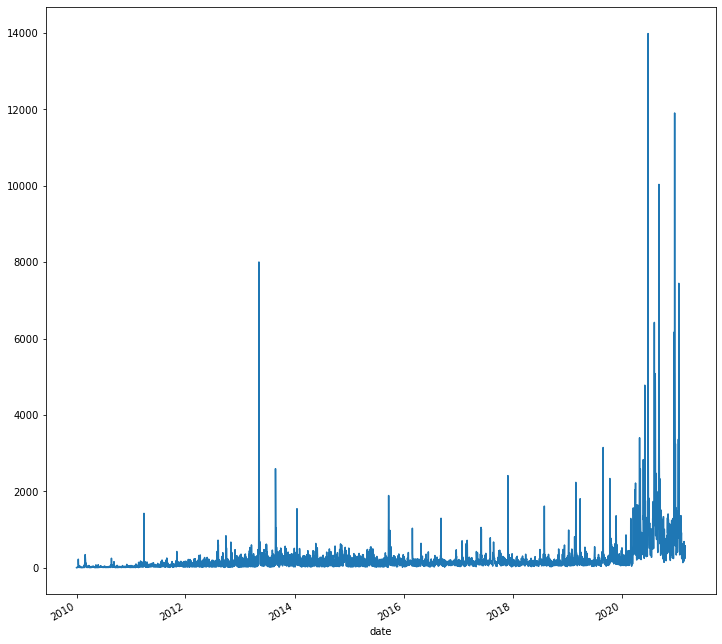

In [57]:
plt.figure(figsize=(12, 12))

(data['volumen']*(1-data['sentiment_raw'])).plot()
#ax = data['volumen'].plot()


ax.set_title('grafico de volumen vs métrica')
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45)
plt.show()

Identificando los peaks de tweets, vemos las palabras más repetidas en tales ocaciones

In [58]:
data[data["volumen"] >= 8000]

,volumen,text,clean_txt,sentiment,sentiment_raw,M,SMA,SMA_SE
date,,,,,,,,
2013-05-07,8003,"ese niño ossa parece tontito, frente preguntas...",niño ossa parece tontito frente preguntas llor...,0.0,0.0,8003.0,514.733333,1443.755231
2020-06-26,13983,"disculpa la ignorancia, que es phising ? menos...",disculpa ignorancia phising menos mal cambie ....,0.0,0.0,13983.0,1452.166667,2516.628191
2020-09-07,10034,los del banco de talca aun estaran a tiempo? u...,talca aun estaran tiempo ud enterado dejo llam...,0.0,0.0,10034.0,2152.200000,1829.363775
2020-12-21,11904,q pasa con el sitio web necesito hacer pagos y...,pasa sitio web necesito hacer pagos dia malo e...,0.0,0.0,11904.0,1436.600000,2310.281362


In [59]:
texto_aux = spikes.loc['2013-05-07']['clean_txt']
tokens = nltk.word_tokenize(texto_aux)
text = nltk.Text(tokens)

tokens_l = [w for w in tokens]
freq = nltk.FreqDist(tokens_l)
print(freq.most_common(30))

[('``', 2455), ('!', 1837), ('caso', 1261), ('abusos', 905), ('pato', 902), ('bachelet', 775), ('estevez', 775), ('concertacion', 748), ('“', 680), ('cobros', 618), ('cencosud', 546), ('”', 543), ('mas', 534), ('gobierno', 505), ('jaime', 490), ('via', 484), ('comisiones', 440), ('ex', 401), ('vidal', 372), ('piñera', 359), ('debe', 333), ('emblematicos', 322), ('nombres', 318), ('abusivos', 310), ('$', 307), ('d', 300), ('clientes', 297), ('pablo', 296), ('salpica', 272), ('x', 272)]


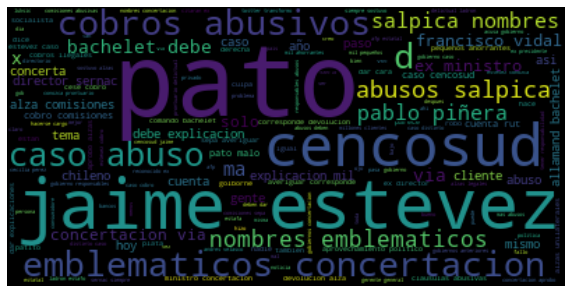

In [60]:
wordcloud = WordCloud(stopwords=stop_words).generate(texto_aux)
plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
 # se tienen 89 ocaciones donde se supera el umbral de los 1400 tweets
spikes = data[data["volumen"] >= 1400]   
#pd.set_option('display.max_rows', spikes.shape[0]+1)
#print(spikes)
#spikes.loc['2011-03-29']['text']

In [26]:
# estudiaremos la fecha del 2011-03-29, 
#para hackeo de banco estado: 2020-09-07:vemos desde 2020-08-31, 2020-09-05, 2020-09-06 y 2020-09-07 
texto1 = spikes.loc['2011-03-29']['clean_txt']
hack01 = spikes.loc['2020-08-31']['clean_txt']
hack02 = spikes.loc['2020-09-05']['clean_txt']
hack03 = spikes.loc['2020-09-06']['clean_txt']
hack = spikes.loc['2020-09-07']['clean_txt']

In [27]:
######### 2011-03-29  #########
tokens = nltk.word_tokenize(texto1)
text = nltk.Text(tokens)

tokens_l = [w for w in tokens]
freq = nltk.FreqDist(tokens_l)
print(freq.most_common(30))

[('!', 672), ('estonotienenombre', 438), ('pato', 265), ('``', 211), ('entn', 181), ('mas', 96), ('ejecutivo', 72), ('chilenos', 71), ('gente', 70), ('tvn', 61), ('nombre', 60), ('clientes', 60), ('seguros', 56), ('hoy', 51), ('patito', 47), ('cara', 45), ('ejecutivos', 45), ('mal', 40), ('....', 39), ('mañana', 36), ('credito', 35), ('ver', 35), ('viendo', 34), ('seguro', 33), ('d', 33), ('menos', 33), ('solo', 33), ('hace', 33), ('hipotecario', 32), ('raja', 32)]


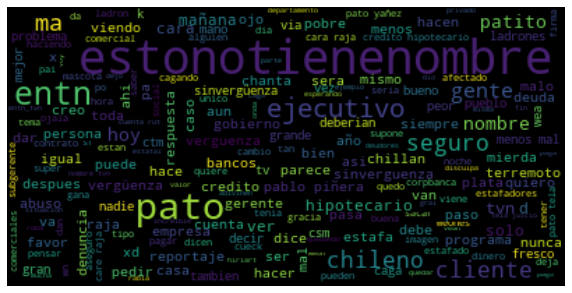

In [28]:
wordcloud = WordCloud(stopwords=stop_words).generate(texto1)
plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [29]:
######### 2020-08-31  #########
tokens = nltk.word_tokenize(hack01)
text = nltk.Text(tokens)

tokens_l = [w for w in tokens]
freq = nltk.FreqDist(tokens_l)
print(freq.most_common(30))

[('!', 642), ('cuenta', 255), ('puedo', 145), ('mensaje', 132), ('mas', 128), ('hacer', 121), ('rut', 109), ('necesito', 108), ('pago', 100), ('dm', 97), ('¡saludos', 90), ('pagar', 87), ('error', 85), ('pagina', 82), ('tarjeta', 82), ('turismo', 79), ('mismo', 78), ('transferir', 77), ('fogape', 75), ('atencion', 75), ('dice', 73), ('app', 69), ('linea', 69), ('comprar', 68), ('dinero', 67), ('numero', 66), ('clave', 65), ('puede', 65), ('telefono', 65), ('realizar', 64)]


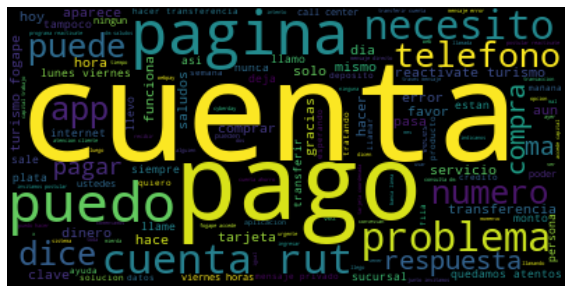

In [30]:
wordcloud = WordCloud(stopwords=stop_words).generate(hack01)
plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [31]:
######### 2020-09-05  #########
tokens = nltk.word_tokenize(hack02)
text = nltk.Text(tokens)

tokens_l = [w for w in tokens]
freq = nltk.FreqDist(tokens_l)
print(freq.most_common(30))

[('!', 911), ('pagina', 341), ('hacer', 279), ('puedo', 269), ('transferir', 235), ('app', 226), ('problema', 215), ('mas', 201), ('pasa', 180), ('pagar', 173), ('transferencias', 164), ('dia', 159), ('error', 155), ('problemas', 154), ('puede', 150), ('mismo', 142), ('realizar', 142), ('atentos', 135), ('transferencia', 127), ('cuenta', 122), ('``', 119), ('deja', 106), ('dm', 105), ('historial', 98), ('tarjeta', 97), ('funciona', 96), ('coordenadas', 93), ('servicio', 90), ('navegador', 90), ('web', 90)]


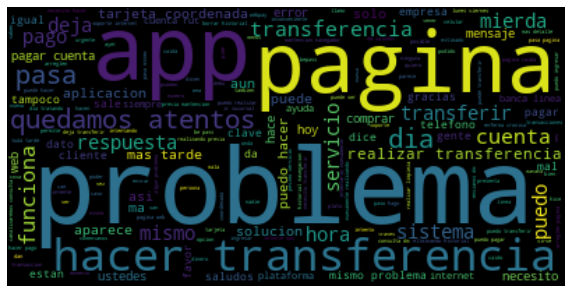

In [32]:
wordcloud = WordCloud(stopwords=stop_words).generate(hack02)
plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [33]:
######### 2020-09-06  #########
tokens = nltk.word_tokenize(hack03)
text = nltk.Text(tokens)

tokens_l = [w for w in tokens]
freq = nltk.FreqDist(tokens_l)
print(freq.most_common(30))

[('!', 1499), ('pagina', 579), ('ayer', 358), ('pagar', 352), ('mas', 331), ('app', 325), ('hacer', 321), ('problemas', 286), ('puedo', 285), ('``', 247), ('cuenta', 243), ('error', 214), ('web', 213), ('problema', 212), ('puede', 207), ('pasa', 192), ('dias', 189), ('funciona', 182), ('servicio', 161), ('dia', 156), ('mismo', 147), ('hace', 140), ('realizar', 138), ('caida', 134), ('cuentas', 130), ('transferir', 129), ('aun', 128), ('transferencias', 117), ('ingresar', 117), ('poder', 116)]


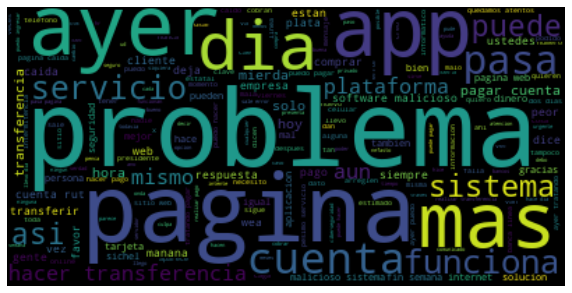

In [34]:
wordcloud = WordCloud(stopwords=stop_words).generate(hack03)
plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [35]:
######### 2020-09-07  #########
tokens = nltk.word_tokenize(hack)
text = nltk.Text(tokens)

tokens_l = [w for w in tokens]
freq = nltk.FreqDist(tokens_l)
print(freq.most_common(30))

[('!', 3001), ('``', 1268), ('mas', 844), ('pagina', 655), ('cuenta', 654), ('sucursales', 645), ('hacer', 590), ('app', 531), ('sichel', 512), ('hoy', 497), ('pagar', 492), ('ataque', 463), ('web', 461), ('software', 418), ('funciona', 415), ('malicioso', 398), ('problemas', 390), ('estan', 389), ('puede', 387), ('hace', 367), ('seguridad', 361), ('problema', 351), ('asi', 345), ('puedo', 335), ('mismo', 334), ('solo', 322), ('dia', 302), ('sistema', 297), ('cuentas', 292), ('ser', 285)]


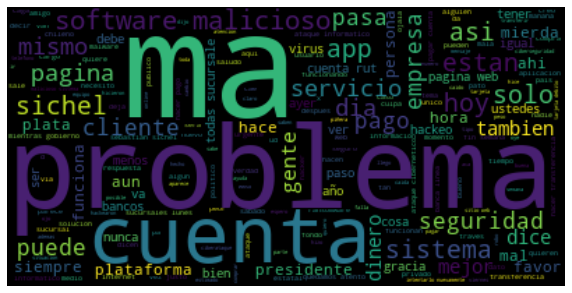

In [36]:
wordcloud = WordCloud(stopwords=stop_words).generate(hack)
plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Detección de incremento importante en los tweets**

Consideraciones:
1) la cantidad de tweets totales aumenta con el tiempo, por lo tanto una métrica histórica no es adecuada.

2) los peak son en volumenes mucho mayores a la cantidad normal de tweets diarios.

3) generalmente hay mas tweets en los días de semana

Viendo que el sentimiento generalizado de los tweets de un día es casi siempre negativo ( valor de 0), mientras que para los tweets diarios tienen medias en torno a 0.1-0.2, teniendo en cuenta que el sentimiento es la probabilidad de ser positivo, entonces el sentimiento generalizado sería el producto de las probabildiades, por lo tanto, si en promedio son cercanos a 0.2, se tendría $0.2^{v}$ donde $v$ es el volumen de tweets, de este modo, a mayor volumen y menor media la probabilidad de ser positivo es nula, en cambio, si el volumen es pequeño (para el caso de tweets en fechas de 2010), no existe una negatividad tan clara.

Tomando en cuenta lo anterior, 
$$ volumen * (1-p_{generaliado})$$
es una métrica que filtra los días con bajo volumen y alta probabildiad de positividad.

Ahora, considerando el tipo de palabras que surgen de estas puntas, al generar un conjunto de palabras importantes para la detección de un sentimiento negativo generalizado, e.g. "pagina", "problema", "caido" entre otras, considerar $NW$ como el número de palabras negativas detectadas en el texto completo de 1 día, al utilizar la métrica
$$ V*(1-p_g)*NW $$
se incorpora para diferenciar si hay un spike de tweets que se asocien a estos problemas en particular.

Luego, considerando una media de tweets mensuales y una volatilidad para el mes movil (día de estudio a un mes atrás), si el volumen de tweets en un día es mayor a la media + SE podría considerarse como peak de tweets, o la ocurrencia de algún evento importante.

In [40]:
# calculando la media móvil de a 1 mes:
data['M'] = data['volumen']*(1- data['sentiment_raw'] )
data['SMA'] = data.iloc[:,5].rolling(window=30).mean()
data['SMA_SE'] = data.iloc[:,5].rolling(window=30).std()

In [41]:
data

,volumen,text,clean_txt,sentiment,sentiment_raw,M,SMA,SMA_SE
date,,,,,,,,
2010-01-01,1,"comienzo 2010 feliz x mi familia, gratitud ban...",comienzo 2010 feliz x familia gratitud cestas ...,8.702934e-01,7.130203e-01,0.286980,NaN,NaN
2010-01-04,8,no me funciona la clave del banco estado :( rt...,funciona clave rt firefox llevan bien || jurab...,6.375392e-05,3.161207e-15,8.000000,NaN,NaN
2010-01-05,11,"y hay otros peores, es cosa de husmear en la b...",peores cosa husmear bd esperando gorrllo afuer...,4.027127e-07,7.368970e-18,11.000000,NaN,NaN
2010-01-06,8,un redbank de banco estado? banco estado de ra...,redbank rancagua independencia llamaba patrici...,8.368187e-08,2.721450e-20,8.000000,NaN,NaN
2010-01-07,5,asi con el lanzamiento en el centro de eventos...,asi lanzamiento centro eventos puro webeo maña...,7.170490e-02,2.306362e-01,3.846819,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-02-26,507,banco estado dando la nota otra vez. no hay tr...,dando nota vez transacciones pesimo ser credit...,0.000000e+00,0.000000e+00,507.000000,538.833333,270.069606
2021-02-27,293,banco estado los domingo no atiende cierto? bu...,domingo atiende cierto busque pagina santander...,0.000000e+00,0.000000e+00,293.000000,523.100000,270.188102
2021-02-28,242,arreglen su mierda de pagina para pagar su put...,arreglen mierda pagina pagar puto cae ! 4 mese...,1.325784e-249,0.000000e+00,242.000000,506.066667,271.299927


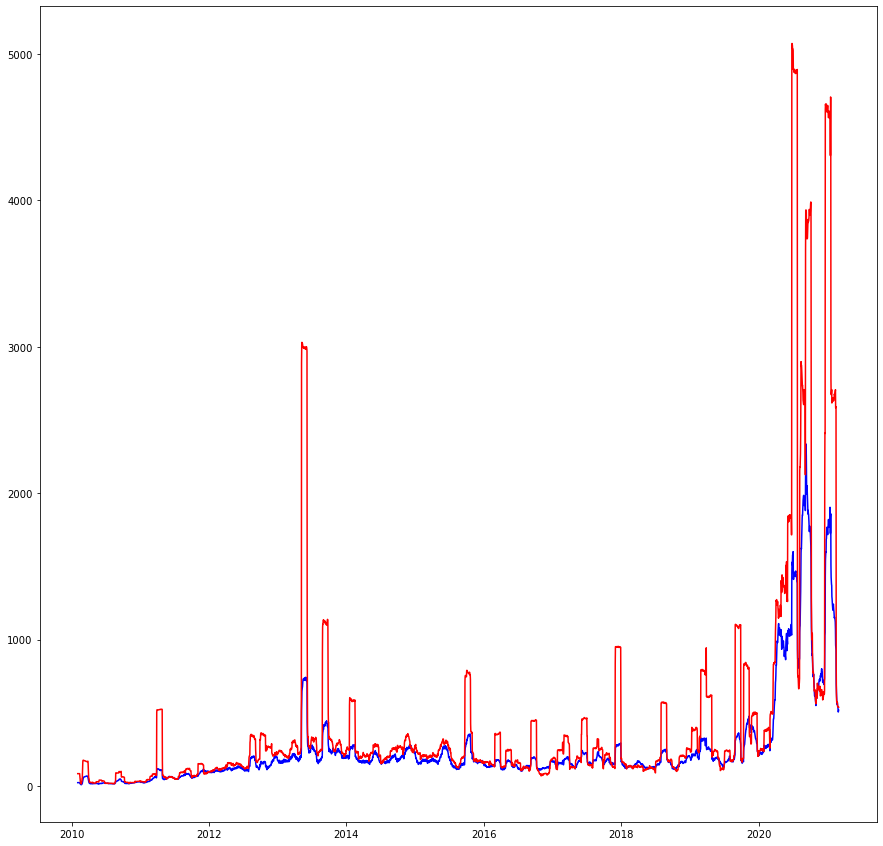

In [62]:
plt.figure(figsize=(15, 15))

plt.plot(data.iloc[:,6],'b')
plt.plot(data.iloc[:,7]*2,'r')
 #ax.set_title('Media móvil 30 días')
 #plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45)
plt.show()

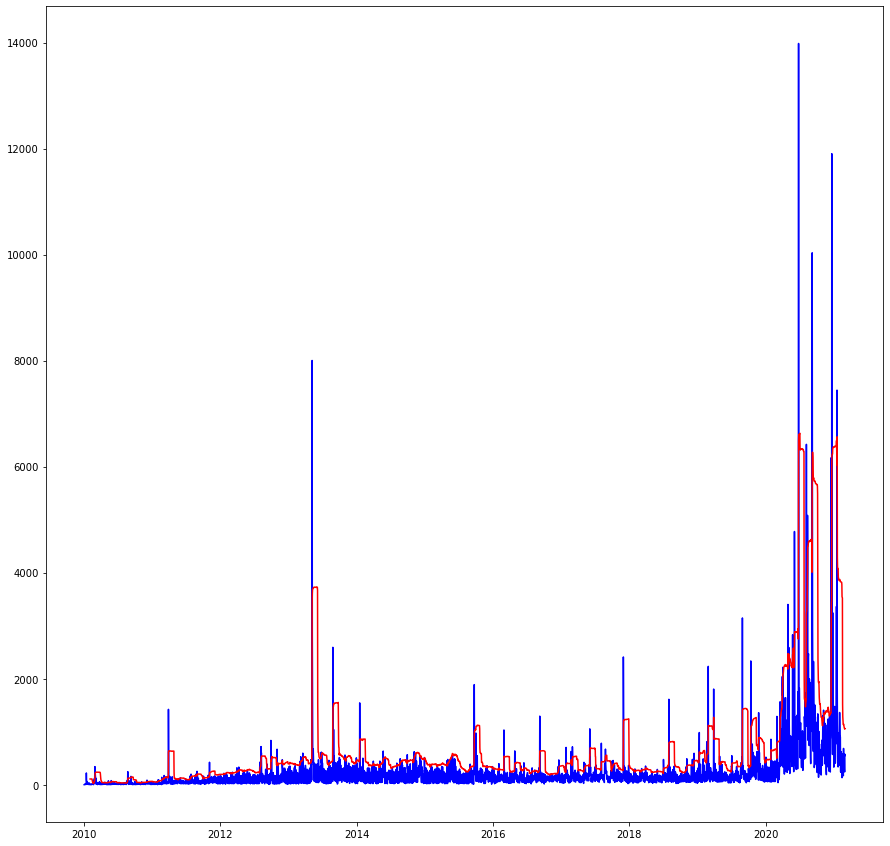

In [52]:
plt.figure(figsize=(15, 15))

plt.plot(data.iloc[:,5],'b')
plt.plot(data.iloc[:,7]*2 + data.iloc[:,6],'r')
 #ax.set_title('Media móvil 30 días')
 #plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45)
plt.show()

In [53]:
# vemos las fechas donde se supera este umbral
data[data["M"] >= data['SMA'] + data['SMA_SE']*2].tail(30)

,volumen,text,clean_txt,sentiment,sentiment_raw,M,SMA,SMA_SE
date,,,,,,,,
2019-10-14,2335,una mierda este basural de banco. sacos de gue...,mierda basural sacos gueas modo plata dura mas...,0.0,0.0,2335.0,239.600000,406.824676
2019-11-25,1359,bancoestado se rie de todos los chilenos.... ...,rie chilenos .... cree reduciendo $ 900 cuenta...,0.0,0.0,1359.0,394.800000,233.915753
2019-12-30,451,"y la celeridad de atencion por email es ""pasar...",celeridad atencion email `` pasar hora sucursa...,0.0,0.0,451.0,215.666667,110.817132
2020-01-03,520,quizas se refiere al credito facil que le otor...,quizas refiere credito facil otorgo compre ser...,0.0,0.0,520.0,221.633333,117.714583
2020-01-30,858,la pagina mala otra vez justo en fin de mes - ...,pagina mala vez justo fin mes - secuestrada es...,0.0,0.0,858.0,259.433333,163.427867
2020-01-31,798,hice una transferencia a una cuenta rut y puse...,hice transferencia cuenta rut puse numero cuen...,0.0,0.0,798.0,279.266667,190.246652
2020-03-02,1289,que pasa con la aplicacion!!! los pacos hicier...,pasa aplicacion ! ! ! pacos hicieron montaje i...,0.0,0.0,1289.0,279.566667,229.772554
2020-03-18,1449,"cuando el ""banco de todos"" hace algo similar ...",`` '' hace similar antofagasta calama laserena...,0.0,0.0,1449.0,383.666667,317.425998
2020-03-19,1565,estas equivocado felipe el frente amplio esta...,equivocado felipe frente amplio equivocado pue...,0.0,0.0,1565.0,429.200000,381.524474
